# Ejercicios Primera Parte. Física de Redes Complejas y Aplicaciones Interdisciplinares.
#### Carlos J. Ramos Salas.
En este notebook se podrán conseguir los códigos y soluciones a los ejercicios propuestos para entregar en el curso de Física de Redes Complejas y Aplicaciones Interdisciplinares. Por comodidad, muchos de los códigos usados no se presentan acá si no que se definen como funciones externas las cuales pueden ser encontradas en el repositorio de [GitHub asociado](https://github.com/ashybabashyba/RedesComplejasUGR) (https://github.com/ashybabashyba/RedesComplejasUGR). Los ejercicios y notas de clase pueden ser encontrados en este [enlace](https://www.ugr.es/~jtorres/master_fisymat.html).

##### Librerias necesarias:

In [86]:
import networkx as nx
from netgraph import Graph
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Capítulo 1: Introducción a los sistemas complejos.

### Ejercicio 1
Simular y analizar el comportamiento complejo del atrayente de Lorentz.
$\begin{align}
    \dfrac{dx}{dt} &= a(y-x), \\
    \dfrac{dy}{dt} &= x(b-z)-y, \\
    \dfrac{dz}{dt} &= xy-cz.
\end{align}$

Las ecuaciones diferenciales se resuelven de manera numérica por medio de un algoritmo de Runge-Kutta presentado en el archivo "RungeKutTa.m".

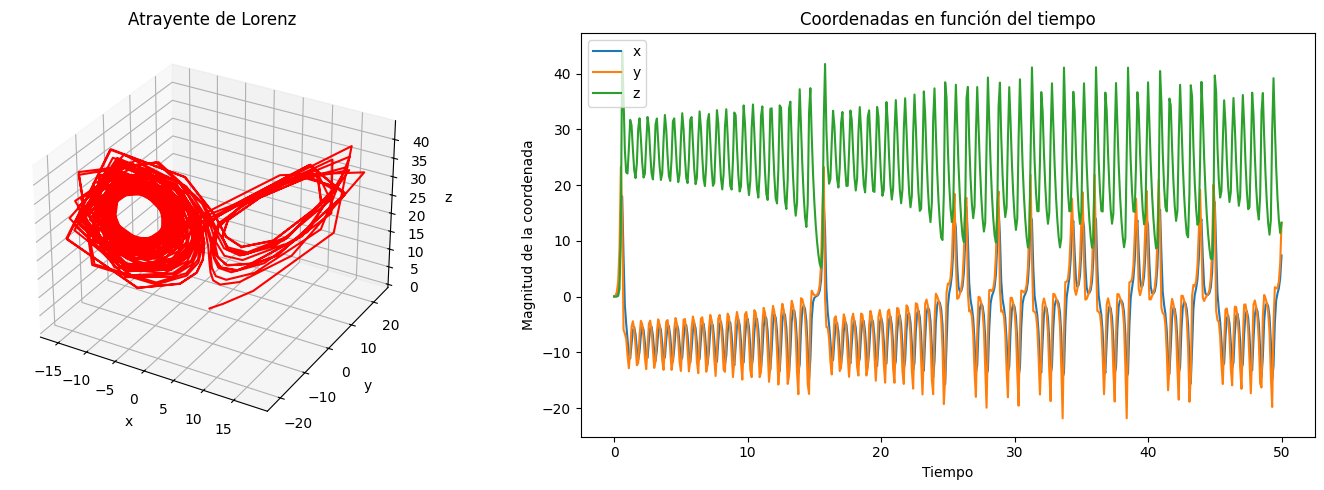

In [30]:
from Codigos import RungeKutta
a=10
b=28
c=8/3

Lorenz=RungeKutta.CrearFuncionLorenz(a,b,c)

# Condiciones iniciales y parámetros
y0 = [0.1, 0.0, 0.0]
t_span = [0, 50]
h = 0.1

# Resolver el sistema de ecuaciones utilizando RK4
t_values, y_values = RungeKutta.runge_kutta_4th_order(Lorenz, y0, t_span, h)

# Crear una figura con subgráficos 3D
fig = plt.figure(figsize=(15, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(y_values[:, 0], y_values[:, 1], y_values[:, 2], color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Atrayente de Lorenz')

# Subgráfico 2
ax2 = fig.add_subplot(122)
ax2.plot(t_values, y_values[:, 0], label='x')
ax2.plot(t_values, y_values[:, 1], label='y')
ax2.plot(t_values, y_values[:, 2], label='z')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Magnitud de la coordenada')
ax2.legend()
ax2.set_title('Coordenadas en función del tiempo')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede observar que en el caso donde $a=0$ se obtiene que la variable x se mantiene constante en su valor inicial como era de esperar, y se obtiene una trayectoria curva en el plano $yz$. Al cambiar el valor a $a=0.1$ la trayectoria cambia completamente su forma ya que la coordenada $x$ tiende a reducir su tamaño en el tiempo. Si se coloca como punto inicial para resolver numéricamente la ecuación al origen, se obtiene que la solución corresponde al mismo origen en todo instante de tiempo, mostrando entonces una estabilidad para todos los valores de $a,b,c$; al cambiar una sola coordenada del punto inicial a $0.1$ la solución cambia radicalmente mostrando evolución de todas las demás, aunque nuevamente, la trayectoria resultante está determinada por los valores de $a,b,c$.

En conclusión, tanto las coordenadas iniciales como las constantes multiplicativas terminan determinando toda la dinámica del problema, se muestra que en efecto pequeños cambios en estos parámetros dan como resultados trayectorias diferentes, por lo que se puede decir que el atrayente de Lorenz tiene un comportamiento caótico. Aún así, el comportamiento más raro y popular que presenta el atrayente de Lorenz se obtiene al fijar $a=10, b=28$ y $c=8/3$.

### Ejercicio 2
Simular y analizar el comportamiento complejo del atrayente de Rössler.
$\begin{align}
    \dfrac{dx}{dt} &= -y-z, \\
    \dfrac{dy}{dt} &= x+a*y, \\
    \dfrac{dz}{dt} &= b+z(x-c).
\end{align}$

Nuevamente se resuelve numéricamente por medio de un algoritmo de Runge-Kutta, la diferencia respecto al ejercicio anterior es que ya no se usa la función "CrearFuncionLorenz" si no "CrearFuncionRossler".

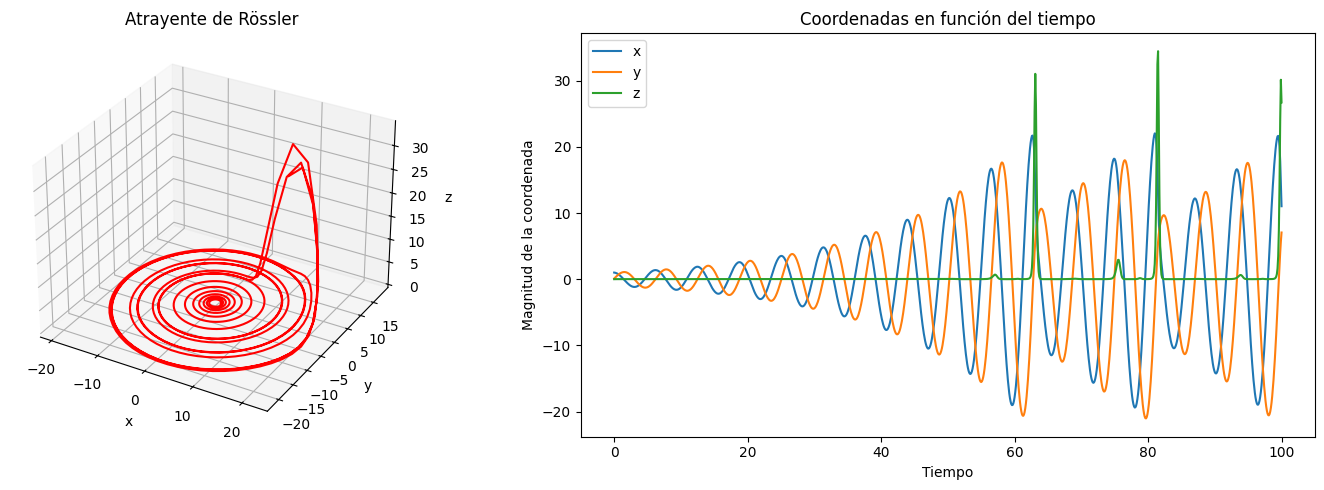

In [31]:
from Codigos import RungeKutta
a=0.1
b=0.1
c=14

Rossler=RungeKutta.CrearFuncionRossler(a,b,c)

# Condiciones iniciales y parámetros
y0 = [1.0, 0.1, 0.0]
t_span = [0, 100]
h = 0.1

# Resolver el sistema de ecuaciones utilizando RK4
t_values, y_values = RungeKutta.runge_kutta_4th_order(Rossler, y0, t_span, h)

# Crear una figura con subgráficos 3D
fig = plt.figure(figsize=(15, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(y_values[:, 0], y_values[:, 1], y_values[:, 2], color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Atrayente de Rössler')

# Subgráfico 2
ax2 = fig.add_subplot(122)
ax2.plot(t_values, y_values[:, 0], label='x')
ax2.plot(t_values, y_values[:, 1], label='y')
ax2.plot(t_values, y_values[:, 2], label='z')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Magnitud de la coordenada')
ax2.legend()
ax2.set_title('Coordenadas en función del tiempo')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En este caso para el análisis de complejidad se dejan fijas las constantes $a,b,c$ en unos de los valores típicos usados para el estudio de este problema, los cuales corresponden a $a=b=0.1$ y $c=14$. Si la coordenada inicial es el cero, la gráfica resultante asemeja a una espiral con pico en el punto de origen, si cambiamos uno de los puntos iniciales a $0.1$ la gráfica resultante cambia un montón presentando ahora una curva con un máximo local, cambiar las otras coordenadas iniciales de magnitud a $0.1$ cambian la posición, magnitud y número de máximos locales que aparecen en el gráfico de la solución.

### Ejercicio 3
Simular el juego de la vida y estudiar su comportamiento emergente.

El código utilizado es una adaptación del código que se puede encontrar en este [enlace](https://hescaso.github.io/gameoflife/). Al ejecutarse se abrirá una ventana aparte donde una nave espacial hace su recorrido. Se puede pausar oprimiendo cualquier tecla (excepto escape) y en ese momento se podrá "encender" o "dar vida" a cuadros para poner la condición a estudiar a voluntad, para retomar el avance solo hay que volver a oprimir cualquier tecla (excepto escape nuevamente). Finalmente, para cerrar la ventana del juego y detener la ejecución del mismo, basta con oprimir la tecla ESC (escape), teniendo en cuenta que en el notebook luego aparecerá una ventana de error y el kernel de Python morirá, así que se tendrá que reiniciar, por ello se aconseja ejecutar de último y no ejecutar de golpe todo.

In [32]:
Enc = 0 #Colocar en 1 si se busca que esta celda reproduzca el juego de la vida

if Enc == 1:
    # Importamos las librerías necesarias:
    import pygame
    import numpy as np
    import time

    # Para comenzar vamos a crear la pantalla de nuestro juego
    pygame.init()

    width = 600
    height = 600

    screem = pygame.display.set_mode((height, width))

    bg = 25, 25, 25
    screem.fill(bg)

    # Número de celdas
    ncX, ncY = 50, 50

    # Dimensiones de las celdas
    dimCW = width / ncX
    dimCH = height / ncY

    #Estado de las celdas. Vivas = 1; Muertas = 0
    gameState = np.zeros((ncX, ncY))

    # Autómata andar
    gameState[21, 21] = 1
    gameState[22, 22] = 1
    gameState[22, 23] = 1
    gameState[21, 23] = 1
    gameState[20, 23] = 1

    # Control de la ejecución del juego
    pauseExect = False

    # Bucle de ejecución
    while True:

        # Creamos un copia del gameState sobre la que haremos los cambios,
        # para que se realicen a la vez en cada vuelta del bucle
        newGameState = np.copy(gameState)

        # Coloreamos la pantalla totalmente de gris cada vuelta.
        screem.fill (bg)

        # Creamos un lapso de tiempo para que se aprecie mejor el movimiento
        time.sleep(0.1)

        # Registramos eventos del teclado y ratón
        ev = pygame.event.get()

        for event in ev:
            # Detectamos si se presiona una tecla
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_ESCAPE:
                    pygame.quit()
                    quit()

                pauseExect = not pauseExect
            # Detectamos si se presiona el ratón
            mouseClick = pygame.mouse.get_pressed()

            if sum(mouseClick) > 0:
                posX, posY = pygame.mouse.get_pos()
                celX, celY = int(np.floor(posX / dimCW)), int(np.floor(posY / dimCH))
                newGameState[celX, celY] = 1

        for y in range(0, ncX):
            for x in range(0, ncY):

                if  not pauseExect:

                    # Calculamos el número de vecinos cercanos
                    n_neigh = gameState[(x-1) % ncX, (y-1) % ncY] + \
                            gameState[(x)   % ncX, (y-1) % ncY] + \
                            gameState[(x+1) % ncX, (y-1) % ncY] + \
                            gameState[(x-1) % ncX, (y)   % ncY] + \
                            gameState[(x+1) % ncX, (y)   % ncY] + \
                            gameState[(x-1) % ncX, (y+1) % ncY] + \
                            gameState[(x)   % ncX, (y+1) % ncY] + \
                            gameState[(x+1) % ncX, (y+1) % ncY]

                    # Rule 1: Una celda muerta con exactamente 3 vecinas vivas, "revive".
                    if gameState[x, y] == 0 and n_neigh == 3:
                        newGameState[x, y] = 1

                    # Rule 2: Una celda viva con menos de 2 o más de 3 celdas vivas alrededor muere.
                    elif gameState[x, y] == 1 and (n_neigh < 2 or n_neigh > 3):
                        newGameState[x, y] = 0

                # Creamos el polígono de cada celda a dibujar
                poly = [((x) * dimCW, y * dimCH),
                        ((x + 1) * dimCW, y * dimCH),
                        ((x + 1) * dimCW, (y + 1) * dimCH),
                        ((x) * dimCW, (y + 1) * dimCH)]

                # Y dibujamos la celda para cada par de X e Y.
                if newGameState[x, y] == 0:
                    pygame.draw.polygon(screem, (128, 128, 128), poly, 1)
                else:
                    pygame.draw.polygon(screem, (255, 255, 255), poly, 0)

        # Actualizamos el estado del juegos
        gameState = np.copy(newGameState)

        # Actualizamos la pantalla
        pygame.display.flip()

En este código se aprovecha de estudiar los ejemplos mencionados en las notas de clase, se verifica que en efecto las formas estáticas son estables y fijas con el paso del tiempo hasta que otra forma interactúe con ella. Se puede confirmar que con las reglas impuestas, con el suficiente paso del tiempo casi todas las condiciones iniciales evolucionan a varias formas de las sencillas presentadas en los apuntes, siendo las predominantes las formas oscilantes, adicionalmente, las formas oscilantes se suelen agrupar bajo ciertas condiciones para formar otras formas oscilantes más grandes.

### Ejercicio 4
Demostrar que con la definición anterior se tiene para variedades continuas (curva, superficie, y volumen) las dimensiones esperadas.

La definición que hace referencia el ejercicio es la dimensión de Hausdorff, donde si $N(a)$ es el número mínimo de esferas d-dimensionales necesarias para cubrir por completo la variedad en cuestión, entonces la dimensión de Hausdorff $D$ está dada como sigue
\begin{equation}
D = \lim_{a \to 0} \left( - \dfrac{Ln(N(a))}{Ln(a)} \right),
\end{equation}
donde $a$ corresponde a la longitud de la división de la variedad. Si queremos partir la variedad en una cantidad entera de $k$ nuevas curvas, se tendrá entonces que la longitud de cada uno de ellos es $a=1/k$, por lo tanto se tiene que el número de segmentos, cuadrados o cubos para recubrir la variedad 1D, 2D y 3D respectivamente estará dada por $N_1(a) = a^{-1}$, $N_2(a) = a^{-2}$ y $N_3(a) = a^{-3}$, de donde finalmente podemos concluir que la dimensión de Hausdorff coincide con la dimensión euclídea en estos casos.$\blacksquare$

### Ejercicio 5
Calcular la dimensión Hausdorff de los siguientes fractales: conjunto de Cantor, isla de Koch, alfombra de Sierpinski y junta de Sierpinski.

Comencemos con el conjunto de Cantor, podemos observar que salvo de la curva inicial, el fractal realmente consiste en dos partes, el segmento de la izquierda y el segmento de la derecha, por ello puede ser recubierto en cualquier etapa por $N=2$ esfera unidimensional, por otro lado, la longitud $a$ puede ser calculada sabiendo que en cada paso se escala el paso anterior por un tercio y se coloca intercalando sobre el tamaño original una vez si, una vez no y otra vez si; a partir de esta interpretación constructiva uno puede deducir que $a=1/3$ (donde hace falta incluir el exponente $k$ que haría referencia a la etapa de construcción del fractal) de donde finalmente siguiendo la ecuación del anterior ejercicio uno concluye que $D \approx 0,83...$

Para la isla de Koch, seguimos con la misma argumentación utilizada anteriormente, podemos ver que en cada etapa se construye escalando por $a=1/3$ la etapa anterior nuevamente, solo que esta vez en el centro si se posiciona el escalado de la etapa anterior dos veces formando un triángulo, por ello realmente se llega a necesitar una cantidad de esferas $N=4$ (nuevamente excluyendo exponentes), finalmente se obtiene entonces $D \approx 1,26...$

Para construir la alfombra de Sierpinski, partimos de un cuadrado al cual escalamos $1/9$ (por tanto al ser dos dimensiones se tiene $a=1/3$) y lo colocamos sobre un nuevo cuadrado (en el cual caben 9 del paso anterior) y se eliminamos la posición central, dado esta construcción, se concluye tambien que son necesarios $N=8$ para cumplir el recubrimiento, por ello se tiene que $D \approx 0.94...$

La construcción de la junta de Sierpinski es en escencia la misma que la alfombra, solo que en vez de trabajar con cuadrados se trabaja con triángulos, por ello se tiene $N=3$ y la escala del triángulo original es $1/4$ (por tanto $a=1/2$), con ello finalmente tenemos que $D \approx 1,58...$

## Capítulo 2: Red Compleja como ejemplo de sistema complejo.

### Ejercicio 1
Dibujar $L_i$ con $i=0, 1, \dots, 8$.

Se utiliza la librería "networkx" para tener representación por código de los grafos, el código utilizado se muestra a continuación.

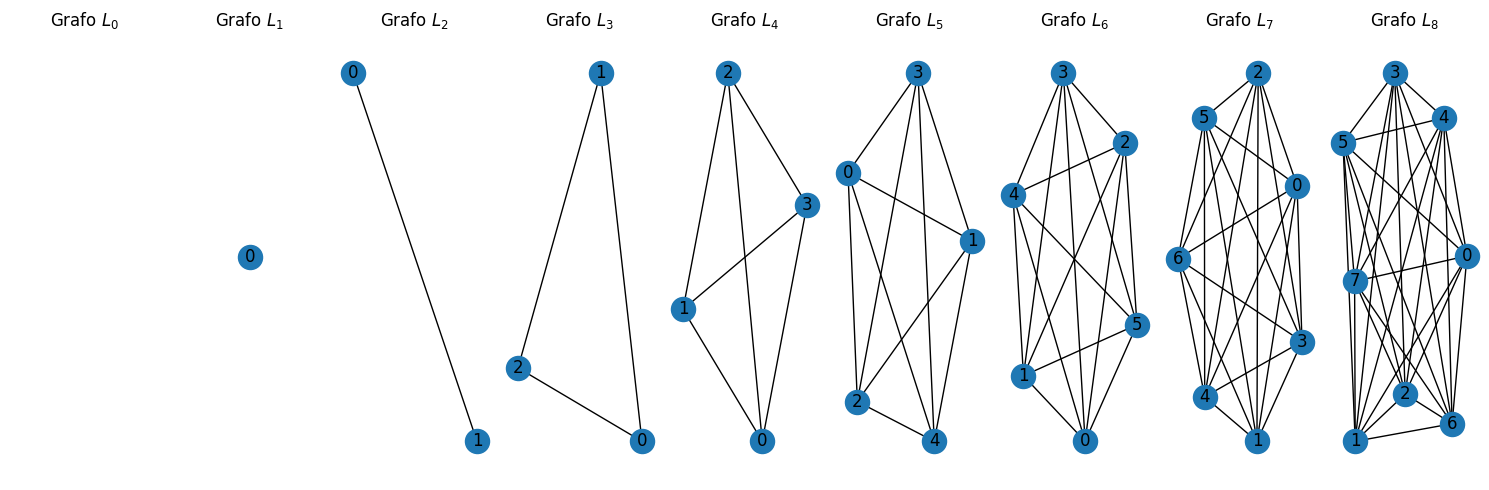

In [33]:
grafos = [nx.complete_graph(n) for n in range(9)]


plt.figure(figsize=(15, 5))
for i, G in enumerate(grafos, 1):
    plt.subplot(1, len(grafos), i)
    nx.draw(G, with_labels=True)
    plt.title(f"Grafo $L_{i-1}$ ")

plt.tight_layout()
plt.show()

Recordemos que por definición el subíndice de $L_i$ representa la cantidad de nodos del grafo a trabajar, y en estos grafos completos cada par de nodos diferentes están conectados por una arista. Como era de esperar $L_0$ corresponde al grafo vacío al no presentar nodos y $L_1$ es simplemente un nodo. Uno de estos grafos también interesante resulta ser $L_5$ pues termina siendo base de otra categoría de grafos estudiados que son los grafos no planos.

### Ejercicio 2
 Calcular la lista de aristas y la matriz de adyacencia para el multigrafo representado en la figura 5.

 <p align="center">
  <img src="Imagenes/Figura5MultiGrafo.png" alt="Multigrafo presente en la figura 5."width="300" height="300">
</p>

En este caso usaremos una notación diferente a las notas de clase. En este caso tomaremos como definición a la matriz transpuesta, es decir, nuestra matriz de adyacencia estaría definida por

\begin{align*}
A_{ij}= \left\{ \begin{matrix}
1 & \text{si el nodo i apunta al nodo j,} \\
0 & \text{en otro caso.}
\end{matrix} \right.
\end{align*}

De esta manera, podemos ver que del nodo $n_1$ sale una arista al nodo $n_2$, del nodo $n_2$ salen una arista a $n_1$, $n_3$ y $n_4$; del nodo $n_3$ sale solo una arista a $n_5$; del nodo $n_4$ salen nodo a si mismo y a $n_3$; por último, de $n_5$ sale una arista a $n_4$. A partir de esto podemos tanto construir tanto la matriz de adyacencia como la lista de aristas.

<p align="center">
<b>Lista de aristas:</b> <br>
  - (1, 2) <br>
  - (2, 1) <br>
  - (2, 3) <br>
  - (2, 4) <br>
  - (3, 5) <br>
  - (4, 3) <br>
  - (4, 4) <br>
  - (5, 4) 
</p>

\begin{equation*}
A = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 
\end{pmatrix} \end{equation*}


### Ejercicio 3
Calcular la lista de aristas y la matriz de adyacencia del grafo pesado que aparece en la figura 5

<p align="center">
  <img src="Imagenes/Figura5GrafoPesado.png" alt="Grafo pesado presente en la figura 5." width="300" height="300">
</p>


Siguiendo el mismo desarrollo del ejercicio anterior se encuentra entonces que:

<p align="center">
<b>Lista de aristas:</b> <br>
  - (1, 2) <br>
  - (2, 3) <br>
  - (2, 4) <br>
  - (3, 5) <br>
  - (4, 3) <br>
  - (5, 4) 
</p>

\begin{equation*}
A = \begin{pmatrix}
0 & 5 & 0 & 0 & 0 \\
0 & 0 & 1 & 6 & 0 \\
0 & 0 & 0 & 0 & 5 \\
0 & 0 & 3 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 
\end{pmatrix} \end{equation*}

### Ejercicio 4
Calcular la matriz de incidencia del grafo bipartito mostrado en el figura 6. ¿Cuál sería la matriz de incidencia si no existiera en dicho grafo el nodo $m_5$?

<p align="center">
  <img src="Imagenes/Figura6.png" alt="GrafoBipartito." width="300" height="300">
</p>


Recordemos que en el caso de un grafo bipartito, la matriz de incidencia a diferencia de la matriz de adyacencia ya no es una matriz cuadrada si no una de tamaño $N \times M$ (aunque en este caso si es cuadrada), definida como sigue

\begin{align*}
B_{ij}= \left\{ \begin{matrix}
1 & \text{si el nodo i de N está unido al nodo j de M,} \\
0 & \text{en otro caso.}
\end{matrix} \right.
\end{align*}

Por lo que la matriz de incidencia en este caso corresponde a 

\begin{equation*}
B = \begin{pmatrix}
0 & 1 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 \\
1 & 0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 & 0 
\end{pmatrix} \end{equation*},

en caso de que no exista el nodo $m_5$, la matriz resultante sería aquella que se obtiene al eliminar la quinta columna, es decir

\begin{equation*}
B' = \begin{pmatrix}
0 & 1 & 1 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 \\
0 & 1 & 0 & 0  
\end{pmatrix} \end{equation*}.

### Ejercicio 5
Dibujar el grafo proyección de nodos del grafo bipartito de la figura 6 y demostrar que el grafo proyección de nodos viene descrito por una matriz de adyacencia $P$ tal que

\begin{equation}
P = BB^T
\end{equation}

<p align="center">
  <img src="Imagenes/Figura6.png" alt="GrafoBipartito." width="300" height="300">
</p>

Recordemos que por definición, el grafo proyección de nodos de un grafo bipartito es el resultante en este caso de tomar como nodos a los $n_i$ y decimos que hay una arista entre $n_i$ y $n_j$ si ambos están conectados con el mismo $m_k$ en el grafo bipartito. Claro está que entonces el grafo proyección es un multigrafo pues por ejemplo cada $n_i$ tiene aristas consigo misma igual al número de aristas que tiene en el grafo bipartito original. Veamos que $B^T$ representa a un "dual" del grafo bipartito original ya que se tomaría al primer conjunto de nodos a $M$ y como segundo conjunto a $N$, esto al cambiar las filas por columnas; de esta manera, se tiene que 

\begin{equation*}
(BB^T)_{ij} = \sum_{k=1}^{|M|} B_{ik}B_{jk},
\end{equation*}

de donde finalmente se obtiene que el elemento $(i,j)$ de la matriz será igual al número de vecinos comunes de $i$ y $j$ (ya que solo en esos vértices el término de la sumatoria no se anula), en otras palabras, se cumple que $P=BB^T$  $_\blacksquare$

Una vez teniendo esto, se utiliza la librería netgraph para dibujar el grafo a partir de la matriz de adyacencia (se cambia la librería para soportar el peso sobre los loops).

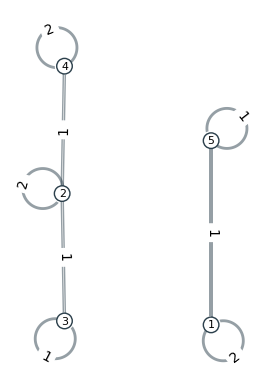

In [40]:
B = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0]
])
sources, targets = np.where(np.dot(B, B.T))
weights = np.dot(B, B.T)[sources, targets]
edges = list(zip(sources, targets))
edge_labels = dict(zip(edges, weights))
node_labels = {i: i + 1 for i in range(5)}

fig, ax = plt.subplots()
Graph(edges, edge_labels=edge_labels, edge_label_position=0.50, node_labels=node_labels, arrows=False, ax=ax)
plt.show()

### Ejercicio 6
Dibujar el grafo proyección de grupos del grafo bipartito de la figura 6 y demostrar que el grafo proyección de grupos viene descrito por una matriz de adyacencia $\hat{P}$ tal que


\begin{equation}
\hat{P} = B^TB
\end{equation}

<p align="center">
  <img src="Imagenes/Figura6.png" alt="GrafoBipartito." width="300" height="300">
</p>

Se sigue un argumento similar al punto anterior de donde se encuentra esta vez que 

\begin{equation*}
(B^TB)_{ij} = \sum_{k=1}^{|N|} B_{ki}B_{kj},
\end{equation*}

de donde finalmente se obtiene que el elemento $(i,j)$ de la matriz será igual al número de elementos en $N$ que tienen como imágen al mismo tiempo a $m_i$ y $m_j$ (ya que solo en esos vértices el término de la sumatoria no se anula), en otras palabras, se cumple que $\hat{P}=B^TB$  $_\blacksquare$

Para la gráfica se utiliza un código prácticamente idéntico al anterior pero cambiando el orden de producto de la matriz.

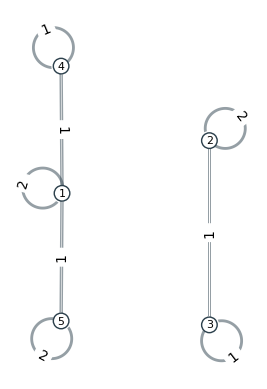

In [6]:
B = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0]
])
sources, targets = np.where(np.dot(B.T, B))
weights = np.dot(B.T, B)[sources, targets]
edges = list(zip(sources, targets))
edge_labels = dict(zip(edges, weights))
node_labels = {i: i + 1 for i in range(5)}

fig, ax = plt.subplots()
Graph(edges, edge_labels=edge_labels, edge_label_position=0.50, node_labels=node_labels, arrows=False, ax=ax)
plt.show()

### Ejercicio 7
Calcular la distribución de probabilidad de grados del grafo no dirigido de la figura 5 y ver que está normalizada.


<p align="center">
  <img src="Imagenes/Figura5GrafoNoDirigido.png" alt="Grafo no dirigido." width="300" height="300">
</p>

Recordemos que por definición, la probabilidad asociada a cada nodo está dada por $P(k) = N(k)/N$, donde en este caso $N=5$ y se tiene que 
\begin{equation}
N(k) = \sum_{i=1}^5 \delta(k, k_i)
\end{equation}
es la cantidad de nodos con $k$ aristas. Teniendo en cuenta el gráfico a estudiar mostrado arriba tenemos entonces las siguientes probabilidades para cada nodo

\begin{align*}
P(k_1) &= \frac{1}{5} \\
P(k_2) &= \frac{1}{5} \\
P(k_3) &= \frac{3}{5} \\
P(k_4) &= 0 \\
P(k_5) &= 0  \\
& \vdots
\end{align*}

De donde fácilmente se puede verificar que la suma es igual a 1.

### Ejercicio 8
 Calcular la distribución de probabilidad de grados del grafo dirigido y del multigrafo que aparecen en la figura 5.



<div style="display: flex; justify-content: center;">
  <img src="Imagenes/Figura5GrafoDirigido.png" alt="Grafo dirigido" style="width: 300px; height: 300px; margin-right: 20px;">
  <img src="Imagenes/Figura5MultiGrafo.png" alt="Multigrafo" style="width: 300px; height: 300px;">
</div>

La diferencia de las distribuciones de probabilidades en estos casos con respecto al ejercicio anterior es que la distribución de probabilidad y número total de nodos ahora se divide en salientes y entrantes (in & out). Por ello para el grafo dirigido tenemos entonces
\begin{align*}
P^{in}(k_0) &= \frac{1}{5}; \ \ &P^{out}(k_0)= 0\\
P^{in}(k_1) &= \frac{2}{5}; \ \ &P^{out}(k_1)= \frac{4}{5}\\
P^{in}(k_2) &= \frac{2}{5}; \ \ &P^{out}(k_2)= \frac{1}{5}\\
P^{in}(k_3) &= 0;           \ \ &P^{out}(k_3)= 0\\
P^{in}(k_4) &= 0;           \ \ &P^{out}(k_4)= 0\\
P^{in}(k_5) &= 0;           \ \ &P^{out}(k_5)= 0\\
& \vdots                    \ \ & \vdots
\end{align*}

Cabe destacar que es necesario agregar la probabilidad asociada a $k_0$ puesto que en estos grafos existe un nodo de donde sale una arista pero no llega ninguna, tanto en salida como en entrada se verifica que la suma de las probabilidades es igual a 1. En el caso del multigrafo se cumple que
\begin{align*}
P^{in}(k_0) &= 0;           \ \ &P^{out}(k_0)= 0\\
P^{in}(k_1) &= \frac{3}{5}; \ \ &P^{out}(k_1)= \frac{3}{5}\\
P^{in}(k_2) &= \frac{1}{5}; \ \ &P^{out}(k_2)= \frac{1}{5}\\
P^{in}(k_3) &= \frac{1}{5}; \ \ &P^{out}(k_3)= \frac{1}{5}\\
P^{in}(k_4) &= 0;           \ \ &P^{out}(k_4)= 0\\
P^{in}(k_5) &= 0;           \ \ &P^{out}(k_5)= 0\\
& \vdots                    \ \ & \vdots
\end{align*}
De donde nuevamente se verifica que esta distribución está normalizada.

### Ejercicio 9
En el grafo no dirigido de la figura 5 calcular el número total de caminos cíclicos de longitud $n = 3$ que empiezan en el nodo $i = 1, 2, 3, 4, 5$.


<p align="center">
  <img src="Imagenes/Figura5GrafoNoDirigido.png" alt="Grafo no dirigido." width="300" height="300">
</p>

Recordemos que por definición, un camino cíclico de longitud $n$ es igual al componente $(i,i)$ de la matriz $A^n$, es decir, $N_{ii}^n=(A^n)_{ii}$. La matriz de adyacencia de este grafo está dada por
\begin{equation*}
A = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 1 & 1 \\
0 & 1 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 & 0
\end{pmatrix}, \end{equation*}
con el código mostrado a continuación se calcula la potencia de la matriz y viendo los términos de la diagonal obtenemos entonces que $N_{11}^3=0, N_{22}^3=2, N_{33}^3= 4, N_{44}^3=4, N_{55}^3=2$.


In [ ]:
A = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 1, 0, 1, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 1, 0]
])
print(np.linalg.matrix_power(A,3))

[[0 3 1 1 2]
 [3 2 6 6 2]
 [1 6 4 5 5]
 [1 6 5 4 5]
 [2 2 5 5 2]]


### Ejercicio 10
Demostrar que para una red regular en forma de anillo donde cada nodo tiene grado $k = 2m$ el coeficiente de agrupamiento es $C = \frac{3(m − 1)}{2(2m − 1)}$.


Seguimos la definición donde el coeficiente de agrupamiento por nodo es igual al número de triángulos que contienen al nodo $i$ dividido por los tripletes que contienen al mismo nodo, luego el coeficiente de agrupamiento general está dado por la suma de cada uno de estos coeficientes dividido por el número total de nodos. Podemos ver que cada triángulo es un triplete pero no viceversa, por lo que $C_i \leq 1$ para todo nodo. Como se está trabajando en una red regular, se tiene que todos los nodos tienen el mismo coeficiente $C_i$, por ello, en este caso se cumple que $C_i = C$. 

Para el caso $m=1$, se tiene una red regular de 2 aristas por nodo, en dicho anillo no se tiene ningún triángulo, por lo que se tiene que $C_i=0$, lo cual coincide con la definición del enunciado. Para $m=2$, se tiene una red regular de 4 aristas por nodos, en ella se puede construir $4$ triángulos y $8$ tripletes, por ello se tiene $C_i=1/2$ que nuevamente coincide con la definición del enunciado.

Supongamos para demostrar por inducción que se cumple la igualdad de definiciones para un valor natural $n$, queremos demostrar que se sigue manteniendo para $n+1$. El paso $n+1$ se puede considerar como tener el mismo grafo con nodos de grado $2n$ y ahora añadir $2$ aristas más a cada nodo. Sabemos por hipótesis de inducción que para $n$, se tiene que el número de triángulos dividido por el número de tripletes es igual a $(3(n-1))/(2(2n-1))$, en caso de añadir dos aristas, sabemos que una cantidad de tripletes que no eran triángulos se vuelven triángulos ahora y nacen nuevos tripletes que no necesariamente son triángulos, la relación de estos nuevos es igual a $3/(2(2n-1)(2n+1))$, por lo que al sumarse con los que había antes se demustra que el coeficiente de agrupamiento es $C_i = 3n/2(2n+2)$ mostrando que ambas definiciones son iguales, probando así por inducción el enunciado,

### Ejercicio 11
Demostrar para las redes de ER los siguientes valores
\begin{align}
& \text{Longitud promedio de caminos: } l \sim Ln(N)/ Ln\langle k \rangle, \\
& \text{Diámetro: } D \sim Ln(N)/ Ln\langle k \rangle, \\
& \text{Coeficiente de agrupamiento: } C_i = p = \langle k \rangle /N.
\end{align}

La definición de coeficiente de agrupamiento presenta conflictos con la usada en las notas de clases, pues en este caso despejando se encuentra $\langle k \rangle = pN$ mientras que en las notas de clase se define $\langle k \rangle = p(N-1)$, sin embargo, como se está trabajando al final y al cabo con una distribución binomial, presenta más sentido utilizar la definición del ejercicio. Usamos la definición de coeficiente de clustering como número de triángulos dividido el número de tripletes, en este caso, como toca trabajar con probabilidades se incluye un factor $p^m$ donde $m$ es el número de aristas necesarias (para la existencia de un triángulo es necesario $p^3$ y para un triplete solo $p^2$), por ello, sabiendo que en ambos casos toda la combinación posible de 3 nodos en $N$ vértices está dada por una combinación, se tiene finalmente que

\begin{equation}
    C_i = \dfrac{\binom{N}{3} p^3}{\binom{N}{3}p^2} = p = \dfrac{\langle k \rangle}{N}.
\end{equation}

Para la longitud promedio de caminos seguimos el argumento descrito en "Fronczak, A., Fronczak, P., & Hołyst, J. A. (2004). Average path length in random networks. Physical Review E, 70(5), 056110. https://doi.org/10.1103/PhysRevE.70.056110", en dicho artículo se demuestra que en un grafo aleatorio caracterizado por una distribución de variables ocultas $\rho(h)$, la longitud promedio de caminos está dada por

\begin{equation}
    l = \dfrac{-2\langle Ln(h) \rangle + Ln(N) + Ln\langle h^2 \rangle - \gamma}{Ln(N) + Ln\langle h^2 \rangle - Ln(\beta)} + \dfrac{1}{2},
\end{equation}
donde $\gamma$ es la constante de Euler y $\beta$ es una constante que depende del nivel de correlación en la red aleatoria (en este caso $\beta = \langle h \rangle N$); en el caso particular de una red de ER, se tiene que $\rho_{ER} = \delta_{\langle h \rangle, k}$ y por lo tanto la longitud promedio de caminos es igual a 
\begin{equation}
    l_{ER} = \dfrac{Ln(N) - \gamma}{Ln\langle k \rangle} + \dfrac{1}{2}.
\end{equation}

Se puede demostrar que si no hay límite de número máximo de aristas en un grafo aleatorio, el diámetro tiende a ser para todos los tipos igual a $2$, esto debido a que la probabilidad de que dado un par de vértices, la probabilidad de que la distancia mínima no es igual a 2 está dada por $(1-p^2)^{n-2}$, donde $p$ es la probabilidad de que exista conexión entre los dos nodos, por lo tanto, el número dentro de la potencia es menor o igual a $1$ y tiende a cero a medida de que $n$ tiende a infinito y por ello el diámetro del grafo es igual a $2$. Sin embargo, por la forma en la que definimos a las redes de ER en el curso, hay un número máximo de aristas que se pueden crear, podemos argumentar que en el caso extremo se tiene que $\langle k \rangle^D \sim N$, de donde al despejar se obtiene entonces finalmente que $D \sim Ln(N) / Ln\langle k \rangle$.

### Ejercicio 12
Construir una red WS con re-cableado y otra en la que no hay re-cableado sino establecimiento con probabilidad p de atajos y comparar las dos redes resultantes y sus propiedades estructurales, $P(k)$, $l$ y $C$.

Para la construcción de una red de Watts-Strogatz con re-cableado se puede volver a utilizar la librería "NetworkX" con la función "watts_strogatz_graph", en esta se tiene que ingresar como argumentos al número de nodos, los grados a vecinos cercanos (en este caso este valor sería equivalente a $2m$, en caso de que se introduzca un valor $k$ impar, se devuelve $k-1$) de cada nodo y la probabilidad de re-cableado. En el caso de que no hay re-cableado si no creación de atajos, no se eliminan las aristas existentes para colocar el atajo, si no más bien se crean nuevas conexiones, este tipo de grafo se puede generar también con una función de la misma librería llamada "newman_watts_strogatz_graph" con los mismos argumentos. Finalmente usamos las funciones "average_shortest_path_length", "average_clustering" y "degree_histogram" para calcular las propiedades estructurales.

Longitud promedio de caminos para WS: 2.3333333333333335
Longitud promedio de caminos para NWS: 1.7555555555555555
Coeficiente de agrupamiento para WS: 0.14333333333333334
Coeficiente de agrupamiento para NWS: 0.2966666666666667
Distribución de probabilidad de grados para WS: [0, 5, 2, 2, 0, 1]
Distribución de probabilidad de grados para NWS: [0, 0, 3, 3, 3, 1]


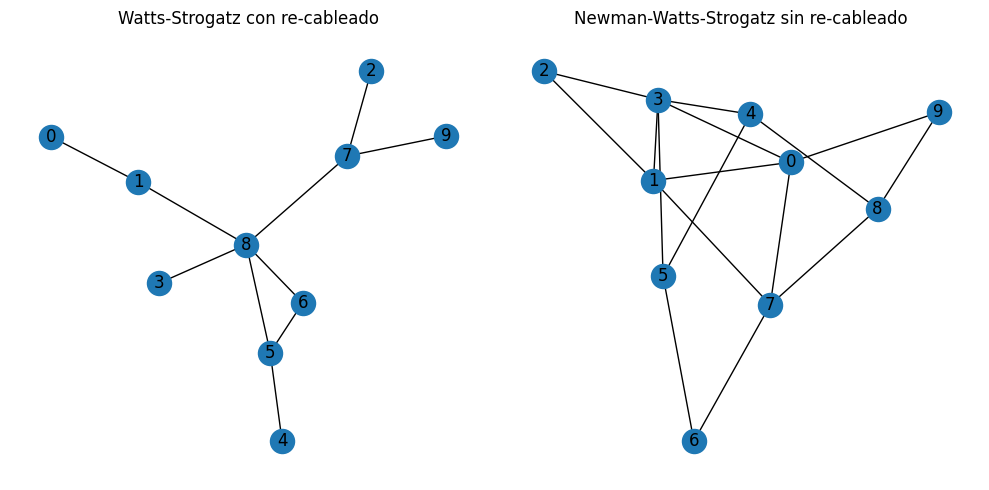

In [41]:
# Creación de los grafos WS y NWS
WS = nx.watts_strogatz_graph(10, 2, 0.6)
NWS = nx.newman_watts_strogatz_graph(10, 2, 0.6)

# Longitud promedio de caminos
WS_PL = nx.average_shortest_path_length(WS)
NWS_PL = nx.average_shortest_path_length(NWS)
print("Longitud promedio de caminos para WS:", WS_PL)
print("Longitud promedio de caminos para NWS:", NWS_PL)

# Coeficiente de agrupamiento
WS_CC = nx.average_clustering(WS)
NWS_CC = nx.average_clustering(NWS)
print("Coeficiente de agrupamiento para WS:", WS_CC)
print("Coeficiente de agrupamiento para NWS:", NWS_CC)

# distribución de probabilidad de grados
WS_DP = nx.degree_histogram(WS)
NWS_DP = nx.degree_histogram(NWS)
print("Distribución de probabilidad de grados para WS:", WS_DP)
print("Distribución de probabilidad de grados para NWS:", NWS_DP)

# Ploteo de los grafos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
nx.draw(WS, ax=axs[0], with_labels=True)
axs[0].set_title('Watts-Strogatz con re-cableado')
nx.draw(NWS, ax=axs[1], with_labels=True)
axs[1].set_title('Newman-Watts-Strogatz sin re-cableado')
plt.tight_layout()
plt.show()

Dado que para NWS existen más aristas que en el grafo WS, es de esperar que la longitud promedio de caminos disminuya a comparación, tal como se puede concluir luego de varias simulaciones, esto muestra en si la efectividad de la creación de atajos y que al no eliminar las antiguas conexiones siempre se mantiene el camino de longitud 1 entre nodos vecinos. El coeficiente de agrupamiento no es comparable al depender de un factor probabilístico, aunque en la mayoría de los casos se puede observar con los parámetros $n=10$, $2m=2$ y $p=0.6$ la red de WS presenta menor valor que NWS, incluso en la mayoría de casos es cero para WS, esto se puede deber a que al eliminar los nodos para realizar el re-cableado limita la creación de muchos triángulos, mientras que el crear nuevas conexiones facilita la creación de nuevos triángulos. Finalmente la distribución de probabilidad de grados en el caso de WS es posible tener nodos aislados y perder conectividad, mientras que en NWS es imposible esta situación.

### Ejercicio 13
Demostrar la siguiente expresión:
\begin{equation}
    Q = \dfrac{1}{2L} \sum_{ij} (A_{ij} - [A_{ij}]_{RAND})s_is_j.
\end{equation}

Partimos de la ecuación
\begin{equation*}
    Q = \dfrac{1}{L} \sum_{ij} (A_{ij} - [A_{ij}]_{RAND})\eta_{ij},
\end{equation*}
donde $\eta_{ij} = (s_is_j + 1)/2$. Si reemplazamos la definición de $\eta$ en la ecuación previa podemos concluir que
\begin{equation*}
    Q = \dfrac{1}{2L} \sum_{ij} (A_{ij} - [A_{ij}]_{RAND})s_is_j + \dfrac{1}{2L}\sum_{ij}(A_{ij} - [A_{ij}]_{RAND}),
\end{equation*}
dado que la sumatoria de la derecha sobre todo los índices se anula, se concluye finalmente la igualdad buscada a demostrar.

### Ejercicio 14
Para redes divididas en solo dos comunidades I y II, demostrar que la $\Sigma_\rho$ nos da un factor $S_{iI}S_{jI} + S_{iII}S_{jII} = (s_is_j +1)/2$.

Se puede demostrar trivialmente siguiendo las definiciones, partimos primero de que
\begin{equation*}
    \eta_{ij} = \sum_{\rho = 1}^M S_{i\rho}S_{j\rho},
\end{equation*}
donde $M$ es el número de comunidades, en este caso solo se tienen dos comunidades, I y II. Desarrollando la sumatoria se obtiene el lado izquierdo de la igualdad a demostrar entonces, mientras que como vimos en el punto pasado, siguiendo la definición $\eta$ se obtiene el lado derecha de la igualdad, concluyendo así la demostración.

## Capítulo 4: Redes de Neuronas.

### Ejercicio 1
Elaborar las puertas lógicas anteriores mediante una red neuronal de tipo McCulloch-Pitts eligiendo convenientemente los valores de los pesos $\omega_{ij}$ y de los umbrales $\theta_i$.


Tomamos como definición a trabajar aquella presentada en la figura 2 de las notas de clase, es decir,
\begin{equation}
    y_i = f\left( \sum_{j} \omega_{ij} x_j + \theta_i \right).
\end{equation}
Podemos definir el argumento de la función como $v_i$, y decimos que $y_i=1$ si $v_i \geq 0$ y $y_i=0$ en caso contrario (función paso). Recordemos adicionalmente los operaciones lógicas que construiremos en este ejercicio definidos por la siguiente tabla de verdad.
<center>

|  A  |  B  | A AND B | A OR B | NOT A | A XOR B |
|:---:|:---:|:-------:|:------:|:-----:|:-------:|
|  0  |  0  |    0    |   0    |   1   |    0    |
|  0  |  1  |    0    |   1    |   1   |    1    |
|  1  |  0  |    0    |   1    |   0   |    1    |
|  1  |  1  |    1    |   1    |   0   |    0    |

</center>

Para la resolución del ejercicio denotamos A por $x_1$, B por $x_2$ y el resultado de la operación lógica por $y_i$, entonces la correspondencia sería $v_1$ para AND, $v_2$ para OR, $v_3$ para NOT y $v_4$ para XOR. Teniendo en cuenta esto, la ecuación del modelo de McCulloch-Pitts toma ahora la forma de 
\begin{equation*}
    v_i = \omega_{i1}x_1 + \omega_{i2}x_2 + \theta_i.
\end{equation*}
Para la compuerta AND queremos entonces que se cumpla el siguiente sistema de inecuaciones
\begin{align*}
    0 &> \theta_1, \\
    0 &> \omega_{12} + \theta_1, \\
    0 &> \omega_{11} + \theta_1, \\
    0 &\leq \omega_{11} + \omega_{12} + \theta_1,
\end{align*}
de donde podemos entonces fijar $\omega_{11}=\omega_{12}=1$ y $\theta_1=-2$ para recrear la compuerta AND. Similarmente para lo compuerta OR se tiene que 
\begin{align*}
    0 &> \theta_2, \\
    0 &\leq \omega_{22} + \theta_2, \\
    0 &\leq \omega_{21} + \theta_2, \\
    0 &\leq \omega_{21} + \omega_{22} + \theta_2,
\end{align*}
de aquí tomamos entonces $\omega_{21}=\omega_{22}=1$ y $\theta_1=-1$ para recrear la compuerta. Para la compuerta NOT, se busca cumplir
\begin{align*}
    0 &\leq \theta_3, \\
    0 &> \omega_{31} + \theta_3, 
\end{align*}
en donde desaparecen los términos asociados a $x_2$ pues la compuerta solo considera al argumento $x_1$, basta con tomar entonces $\omega_{31}=-1$ y $\theta_3=0$. Finalmente para la compuerta XOR se tiene
\begin{align*}
    0 &> \theta_4, \\
    0 &\leq \omega_{42} + \theta_4, \\
    0 &\leq \omega_{41} + \theta_4, \\
    0 &> \omega_{41} + \omega_{42} + \theta_4,
\end{align*}
podemos ver que por lo menos utilizando la función paso no existe solución para este sistema; para poder solucionarlo es necesario utilizar alguna otra función, en este caso se puede proponer la función a trozos que valga 1 si el argumento es mayor o igual a $0$ y menor estricto a $1$ y cero en otro caso, con eso el sistema de inecuaciones se convierte en 
\begin{align*}
    0 &> \theta_4 \text{ ó } \theta_4 \geq 1, \\
    0 &\leq \omega_{42} + \theta_4 <1, \\
    0 &\leq \omega_{41} + \theta_4 < 1, \\
    0 &> \omega_{41} + \omega_{42} + \theta_4 \text{ ó } \omega_{41} + \omega_{42} + \theta_4 \geq 1,
\end{align*}
este sistema se cumple si se toma $\omega_{41}=\omega_{42}=1$ y $\theta_4=-1$.

### Ejercicio 2
Simular el modelo de Hodgkin-Huxley y determinar el rango de $I$ en el que aparecen oscilaciones.

Se utiliza como código una adaptación al código que es presentado en este [enlace](https://www.bonaccorso.eu/parallel-universes/my-technical-books/technical-posts/hodgkin-huxley-spiking-neuron-model-in-python/), utilizamos una función de scipy "odeint" para resolver las ecuaciones diferenciales del modelo HH.

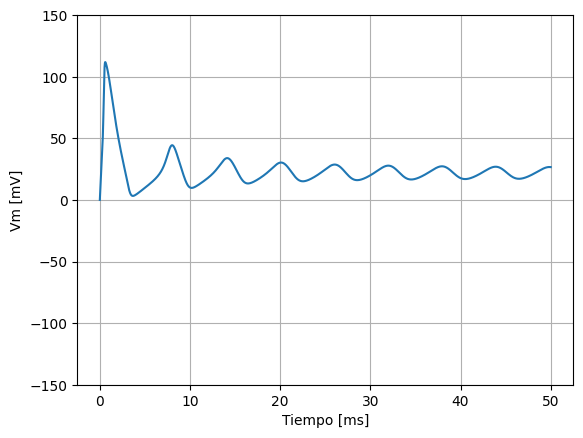

In [30]:
# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 50.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  
# Input stimulus
def Id(t):
    # if 0.0 < t < 1.0:
    #     return 50.0
    # elif 10.0 < t < 11.0:
    #     return 50.0
    return 150.0
  
# Compute derivatives
def compute_derivatives(y, t0, stimulus):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (stimulus(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, T, args=(Id,))

plt.plot(T, Vy[:,0], label='Vy(t)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Vm [mV]')
plt.ylim((-150, 150))
plt.grid(True)
plt.show()

Este primer output corresponde a la generación repetitiva de potenciales de acción en el modelo de HH con una corriente o estímulo $I=10 \mu A/cm^2$ y es equivalente al mostrado en las notas de clase. En este caso, por las condiciones iniciales escogidas en el código se tiene un desplazamiento de $65mV$ en el eje vertical, centrando así todos los resultados en el cero.

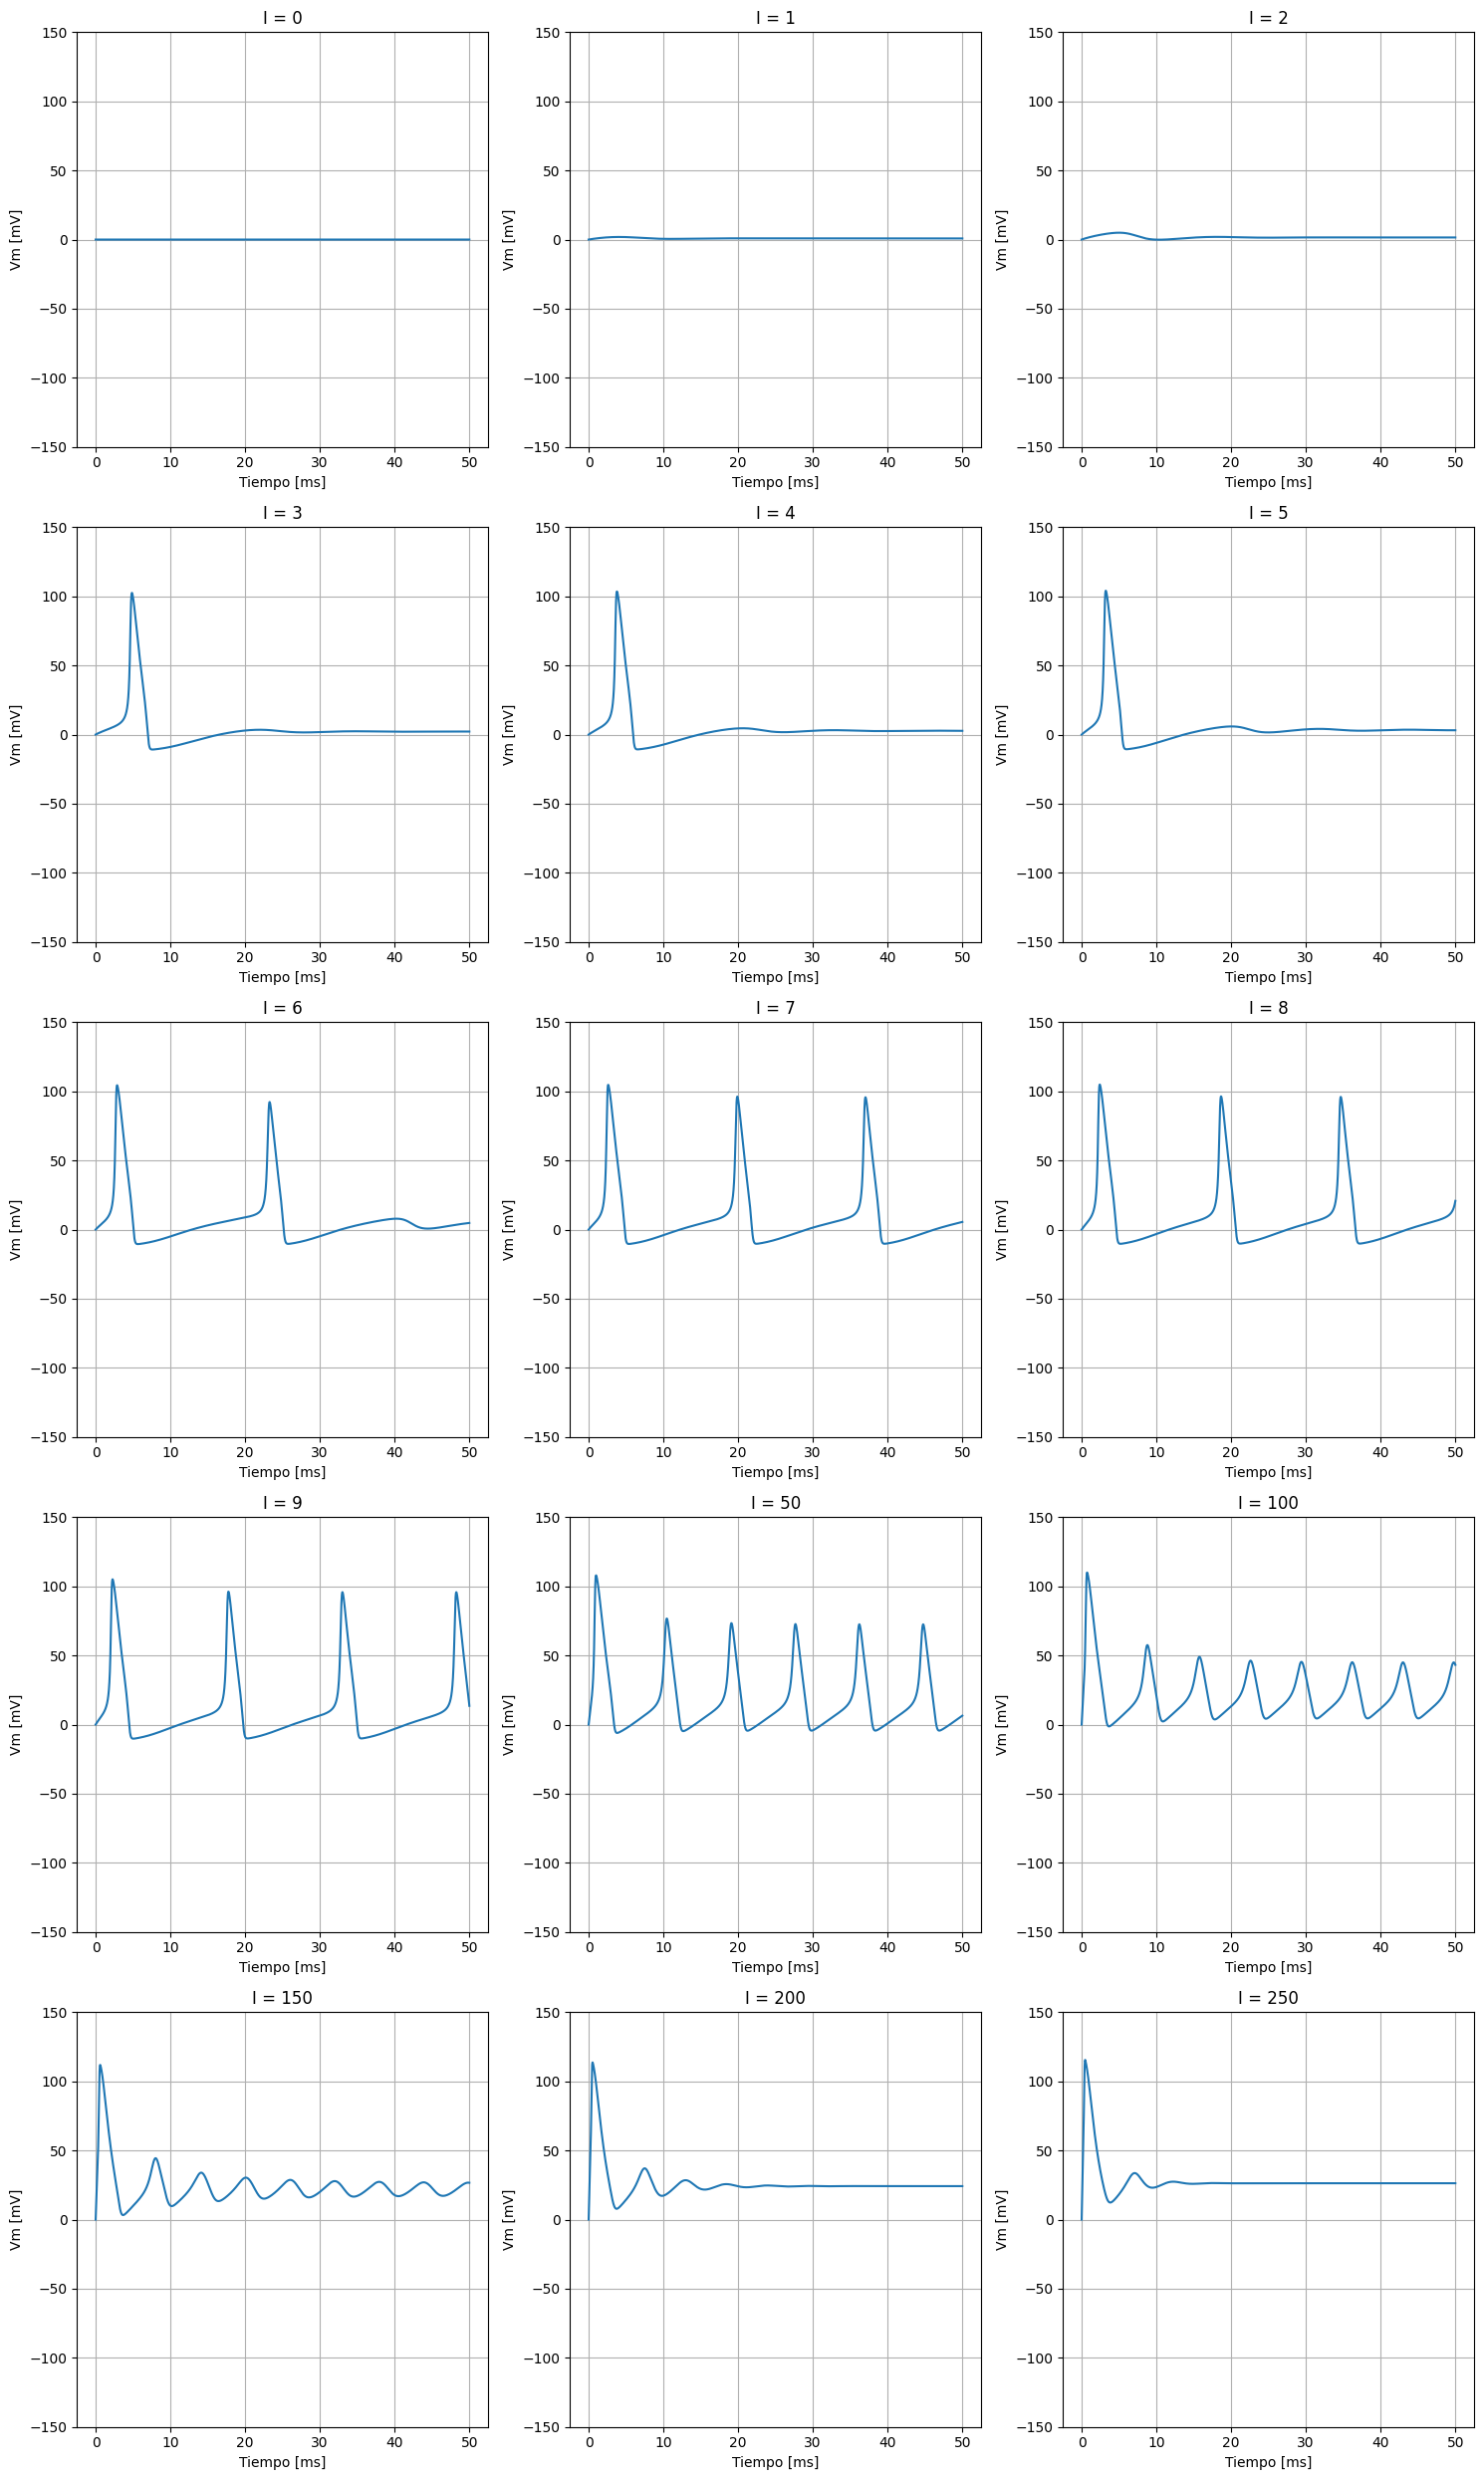

In [47]:
stimulus_values1 = np.arange(50, 301, 50)
stimulus_values1 = stimulus_values1[:-1]

stimulus_values2 = np.arange(0, 11, 1)
stimulus_values2 = stimulus_values2[:-1]

stimulus_values = np.concatenate((stimulus_values2, stimulus_values1))

num_rows = len(stimulus_values) // 3
if len(stimulus_values) % 3 != 0:
    num_rows += 1

# Configurar la figura con subgráficos en dos columnas
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Iterar sobre los valores del estímulo y graficar en los subgráficos
for i, stimulus_value in enumerate(stimulus_values):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    def stimulus_func(t):
        return stimulus_value

    Vy = odeint(compute_derivatives, Y, T, args=(stimulus_func,))
    
    ax.plot(T, Vy[:,0])
    ax.set_title(f'I = {stimulus_value}')
    ax.set_xlabel('Tiempo [ms]')
    ax.set_ylabel('Vm [mV]')
    ax.set_ylim((-150, 150))
    ax.grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

En el anterior código se realiza la misma resolución pero ahora actualizando el estímulo en un ciclo for para poder ver rangos más grandes sin necesidad de estar cambiando valores uno a uno. El primer potencial de acción se muestra en $I=3$ por lo que comienzan a aparecer entre este valor e $I=2$. Po otro lado, podemos ver que a medida que se aumenta el valor del estímulo suelen aparecer más potenciales de acción hasta que la onda se empieza a amortiguar, el valor de amortiguación ocurre entre $I=150$ e $I=200$.

### Ejercicio 3
Simular el modelo reducido de HH.

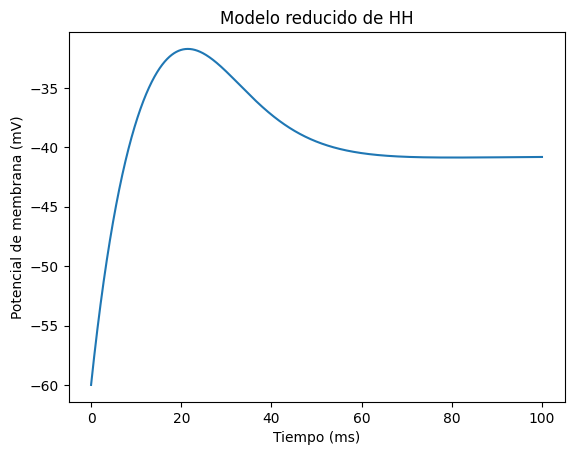

In [80]:
# Parámetros del modelo
C = 20.0
gCa = 4.0
gK = 8.0
gL = 2.0
VCa = 120.0
VK = -84.0
VL = -60.0
phi = 0.04
I = 75.0

def alpha_n(V):
    return 0.02 * (V + 25) / (1 - np.exp(-(V + 25) / 9))

def beta_n(V):
    return 0.5 * np.exp(-(V + 40) / 40)

def m_inf(V):
    return 0.5 * (1 + np.tanh((V + 1.0) / 15.0))

def n_inf(V):
    return alpha_n(V) / (alpha_n(V) + beta_n(V))

def tau_n(V):
    return 1 / (phi * (alpha_n(V) + beta_n(V)))

# Ecuaciones diferenciales
def dvdt(t, V, n):
    return (I - gCa * m_inf(V) * (V - VCa) - gK * n * (V - VK) - gL * (V - VL)) / C

def dndt(t, V, n):
    return (n_inf(V) - n) / tau_n(V)

# Valores iniciales y tiempo de simulación
V0 = -60.0  
n0 = n_inf(V0)  
tstart, tend = 0, 100
dt = 0.01
tspan = np.arange(tstart, tend + dt, dt)
V = np.zeros_like(tspan)
n = np.zeros_like(tspan)
V[0] = V0
n[0] = n0

# Simulación del modelo
for i in range(1, len(tspan)):
    V[i] = V[i - 1] + dt * dvdt(tspan[i - 1], V[i - 1], n[i - 1])
    n[i] = n[i - 1] + dt * dndt(tspan[i - 1], V[i - 1], n[i - 1])

plt.figure()
plt.plot(tspan, V, linewidth=1.5)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana (mV)')
plt.title('Modelo reducido de HH')
plt.show()

En el código anterior se presenta un código mediante el cual se resuelve el modelo reducido y se puede graficar el potencial de la membrana en función del tiempo, se puede observar al igual que en el modelo de HH, que existe una corriente la cual sobreestimula al potencial haciendo que se vuelva constante en algún valor, el potencial al que converge en el tiempo depende de la corriente inducida.

### Ejercicio 4
Integrar numéricamente el modelo de FN (ecuación 7) y estudiar los diferentes comportamientos dinámicos que pueden aparecer.

\begin{align*}
    \dfrac{dV}{dt} &= V - \dfrac{V^3}{3} + u + I, \\
    \dfrac{dU}{dt} &= V + a - bU.
\end{align*}


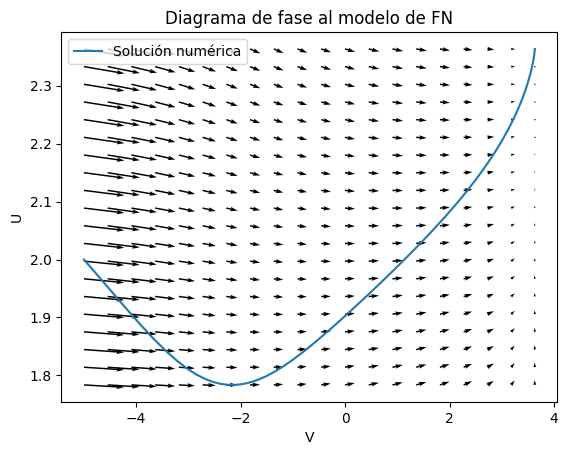

In [65]:
# Condiciones iniciales
a = 20
b = 10
I = 10
ic = [-5.0, 2.0]

# Definición de las ecuaciones diferenciales
def dVdt(V, U):
    return V - (V**3)/3 + U + I

def dUdt(V, U):
    return V + a - b*U

def field_func(xy, t=0):
    V, U = xy
    return [dVdt(V, U), dUdt(V, U)]

# Solver numérico
sol = odeint(field_func, ic, np.linspace(0, 10, 1000)) 

# Rango de valores para V y U
V = np.linspace(np.min(sol[:, 0]), np.max(sol[:, 0]), 20)
U = np.linspace(np.min(sol[:, 1]), np.max(sol[:, 1]), 20)

V, U = np.meshgrid(V, U)
dV = dVdt(V, U)
dU = dUdt(V, U)

plt.quiver(V, U, dV, dU)
plt.plot(sol[:, 0], sol[:, 1], label='Solución numérica')
plt.xlabel('V')
plt.ylabel('U')
plt.legend()
plt.title('Diagrama de fase al modelo de FN')
plt.show()



En el código presentado anteriormente se utiliza nuevamente una función de integración numérica para resolver el sistema, donde en particular se tomo a la función $f$ original en las notas de clases como la identidad. Se puede observar que para tener cambios importantes en la dinámica de la solución, la constante $a$ debe cambiar en ordenes parecidas a las variables de integración, por otro lado el factor $b$ permite cambiar una tasa de crecimiento respecto a la variable $U$. De igual manera el sistema es muy susceptible al punto inicial de integración $V_0$, $U_0$ como para el forzamiento o estímulo $I$.

### Ejercicio 5
Demostrar que en dimensión 2 en un grafo regular con grado k = 4 se tiene que la expresión anterior se corresponde con un término difusivo en la forma $D \nabla^2 V (x, t)$ en la dinámica del voltaje de la membrana de las neuronas. Si $G_{ij}^e$ es la conductancia (constante en el tiempo):

\begin{equation}
    I_i^{syn} = \sum_{j\text{ vec } i} G_{ij}^e(V_i - V_j).
\end{equation}

Como estamos hablando de un grafo, es necesario primero recordar la definición de un laplaciano sobre esta estructura, denominado "Laplaciano discreto" y definido como sigue
\begin{equation}
    (\Delta \phi )(v)=\sum _{w:\,d(w,v)=1}\left[\phi (v)-\phi (w)\right],
\end{equation}
donde el indice de la sumatoria hace referencia a los nodos vecinos. En este caso en particular, como estamos trabajando en un grafo regular, podemos asumir que $G$ tiene el mismo valor para cada nodo, por lo que puede salir de la sumatoria, adicionalmente es bueno recordar que la conductancia nos permite saber la facilidad con la que una corriente eléctrica puede fluir a través de los nodos, por lo que si puede jugar el papel de una constante difusiva. Si sacamos entonces la conductancia de la sumatoria, probamos que en efecto la corriente sináptica es la conductancia por el laplaciano discreto del potencial, concluyendo así el ejercicio.

### Ejercicio 6
Simular el modelo de Tsodyks-Markram de sinapsis dinámica y ver la forma del potencial postsináptico excitador EPSP, usando por ejemplo un modelo lineal de integración y disparo para la neurona postsináptica cuando está sometida a un tren de pulsos presinápticos periódicos que llegan a una frecuencia $f$ dada.

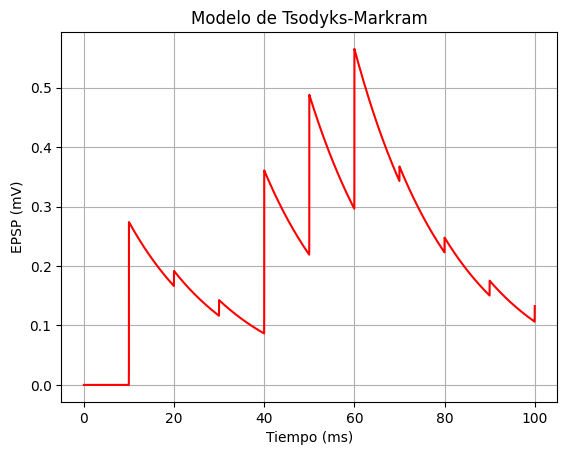

In [5]:
# Parámetros del modelo
A = 1
tau_rec = 0.8
tau_in = 0.2
U0 = 0.5
tau_f = 0.1
tau_m = 20
E_syn = 0
I_ext = 0
Rin = 10


f = 100
T = 100
dt = 0.01
t = np.arange(0, T + dt, dt)
N = int(np.floor(f * T / 1000))
t_sp = np.linspace(0, T, N + 1)

# Inicialización de las variables
x = np.zeros_like(t)
y = np.zeros_like(t)
z = np.zeros_like(t)
U = U0 * np.ones_like(t)
EPSP = np.zeros_like(t)

# Función auxiliar para calcular la función delta de Dirac
def delta(t, t_sp):
    epsilon = 0.01
    d = np.zeros_like(t_sp)
    for i in range(len(t_sp)):
        if np.abs(t - t_sp[i]) < epsilon:
            d[i] = 1 / (2 * epsilon)
        else:
            d[i] = 0
    return d

# Resolucion las ecuaciones diferenciales
for i in range(1, len(t)):
    x[i] = x[i - 1] + dt * (1 - x[i - 1]) / tau_rec - U[i - 1] * x[i - 1] * np.sum(delta(t[i], t_sp))
    y[i] = y[i - 1] + dt * (U[i - 1] * x[i - 1] - y[i - 1] / tau_in)
    z[i] = z[i - 1] + dt * (y[i - 1] / tau_in - z[i - 1] / tau_rec)
    U[i] = U[i - 1] + dt * ((U0 - U[i - 1]) / tau_f - U0 * (1 - U[i - 1]) * np.sum(delta(t[i], t_sp)))

    Isyn = A * y[i] * np.sum(delta(t[i], t_sp))
    dVdt = (-EPSP[i - 1] + Rin * Isyn) / tau_m
    EPSP[i] = EPSP[i - 1] + dt * dVdt


plt.figure()
plt.plot(t, EPSP, 'r', linewidth=1.5)
plt.grid(True)
plt.xlabel('Tiempo (ms)')
plt.ylabel('EPSP (mV)')
plt.title('Modelo de Tsodyks-Markram')
plt.show()


### Ejercicio 7
Simular el modelo de Hopfield a temperatura finita $T > 0$ con un solo patrón y calcular la curva de solapamiento $m^1(T)= \dfrac{4}{N} \sum_i (2V_i^1 - 1)(2V_i -1)$.


## Capítulo 6: Redes Sociales.

### Ejercicio 1
Simular el modelo del votante en una red pequeño mundo y en una red de Barabási-Albert y estudiar su comportamiento emergente, en particular ver el efecto de la densidad de atajos y la heterogeneidad en el comportamiento emergente y si se viola o no la conservación de la magnetización.

Para crear un red pequeño mundo utilizamos de nuevo la función de networkx para crear una red WS, similarmente, usamos la función "barabasi_albert_graph" para la creación de una red de BA. Finalmente se utiliza otra función de la misma librería denominada "voterank", la cual tiene como argumeno un grafo y devuelve como resultado del algoritmo una lista con los nodos de mayor influencia o importancia en un modelo de votación.

Nodos con mayor influencia para WS: [14, 12, 13, 9, 7, 8, 3, 5, 11, 15, 10]
Nodos con mayor influencia para BA: [1, 0, 5, 6, 8, 4, 13, 3, 11, 2, 10]


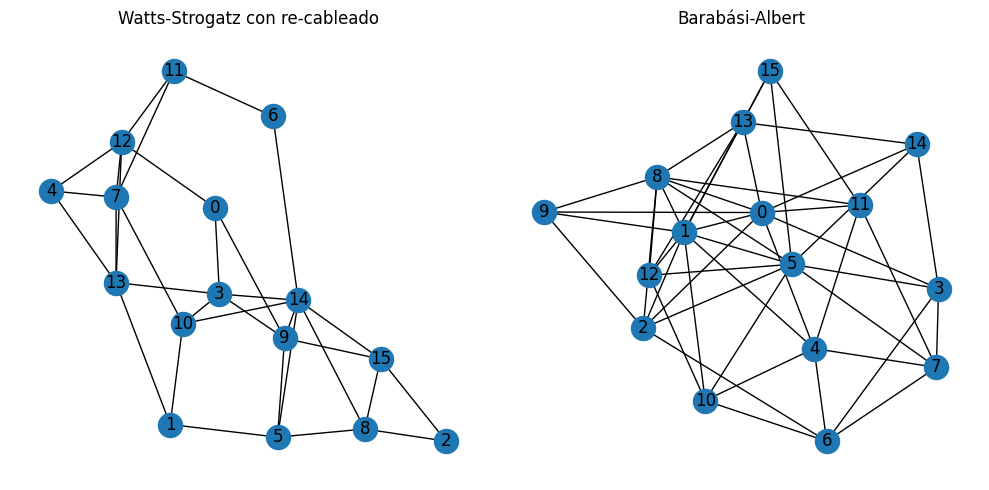

In [80]:
# Creación de los grafos WS y NWS
WS = nx.watts_strogatz_graph(16, 4, 1)
BA = nx.barabasi_albert_graph(16, 4, initial_graph=nx.random_regular_graph(4, 8))

print("Nodos con mayor influencia para WS:", nx.voterank(WS))
print("Nodos con mayor influencia para BA:", nx.voterank(BA))

# Ploteo de los grafos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
nx.draw(WS, ax=axs[0], with_labels=True)
axs[0].set_title('Watts-Strogatz con re-cableado')
nx.draw(BA, ax=axs[1], with_labels=True)
axs[1].set_title('Barabási-Albert')
plt.tight_layout()
plt.show()

Para la red de BA, es necesario introducir un argumento de grafo inicial para resultados más aleatorios, en este caso introducimos un grafo regular de 4 aristas y la mitad de nodos que el destino, en este caso, 8. La primera observación que sale a la vista es que la cantidad de nodos influyentes para la red WS suele disminuir a medida que la probabilidad aumenta, esto debido a que para probabilidades muy pequeñas, el grafo resultante suele ser muy cercano a un grafo regular donde todos los nodos tienen la misma magnitud de importancia. Por otro lado, para la red de BA los nodos más importantes suelen ser los nodos que conformaban al grafo inicial/base, de hecho en caso de no colocar el argumento de un grafo inicial, en casi todas las simulaciones el nodo $0$ será el que tenga más influencia o al menos uno de los más importantes.

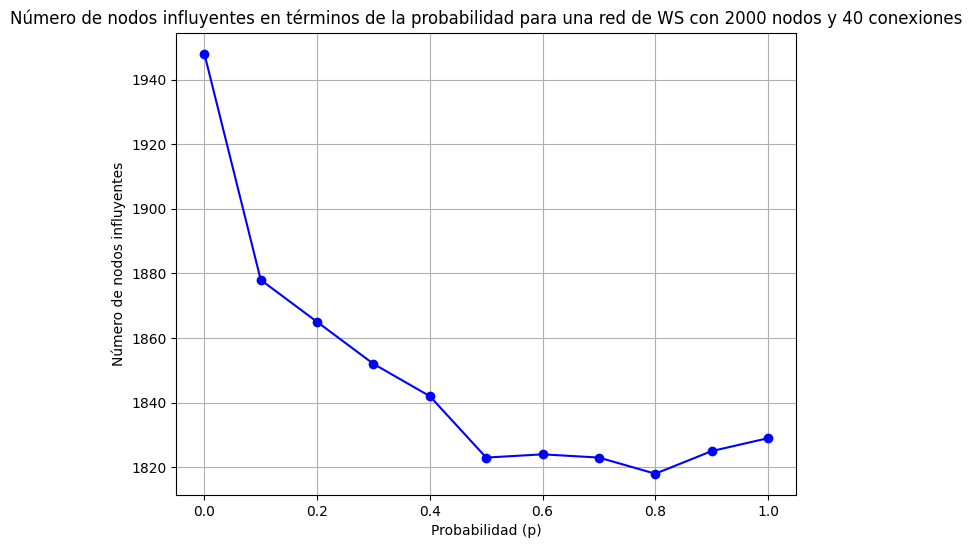

In [85]:
# Por las condiciones puestas en el grafo y python en general, este código demora 6 minutos en ejecutarse
probabilities = [i / 10.0 for i in range(11)]
voterank_dimensions = []
for p in probabilities:
    WS = nx.watts_strogatz_graph(2000, 40, p)
    dimension = len(nx.voterank(WS))
    voterank_dimensions.append((p, dimension))
prob_values, dim_values = zip(*voterank_dimensions)

plt.figure(figsize=(8, 6))
plt.plot(prob_values, dim_values, marker='o', linestyle='-', color='b')
plt.xlabel('Probabilidad (p)')
plt.ylabel('Número de nodos influyentes')
plt.title('Número de nodos influyentes en términos de la probabilidad para una red de WS con 2000 nodos y 40 conexiones')
plt.grid(True)
plt.show()

### Ejercicio 2
Estudiar las soluciones del sistema anterior y su estabilidad e interpretar cada uno de los estados estacionarios posibles.
\begin{equation}
    \dfrac{dm}{dt} = 2^{-(a+1)}(1-m^2)[(1+v)(1+m)^{a-1}-(1-v)(1-m)^{a-1}].
\end{equation}

Los estados estacionarios se consiguen cuando la derivada es igual a cero, directamente al ver la expresión sabemos que un estado estacionario corresponde a $m=0$ el cual se puede interpretar en el modelo de competición de lenguajes como que existe una densidad por igual entre los dos lenguajes. En el caso donde $m \neq 0$, se tiene que
\begin{equation*}
    (1+v)(1+m)^{a-1} = (1-v)(1-m)^{a-1},
\end{equation*}
de donde se puede encontrar que
\begin{equation*}
    \dfrac{1+m}{1-m} = \left( \dfrac{1-v}{1+v} \right)^\dfrac{1}{a-1} = K,
\end{equation*}
y finalmente se obtiene
\begin{equation*}
    m = \dfrac{K-1}{K+1}.
\end{equation*}
Dependiendo del valor de $K$ se puede obtener entonces predominancia hacia un lenguaje u otro ya que este valor está entre cero y uno, en otras palabras, sería el estado correspondiente a que se erradique uno de los dos idiomas o no.

## Ejercicios extras.

### Exponente de Lyapunov

0.9093803833760808


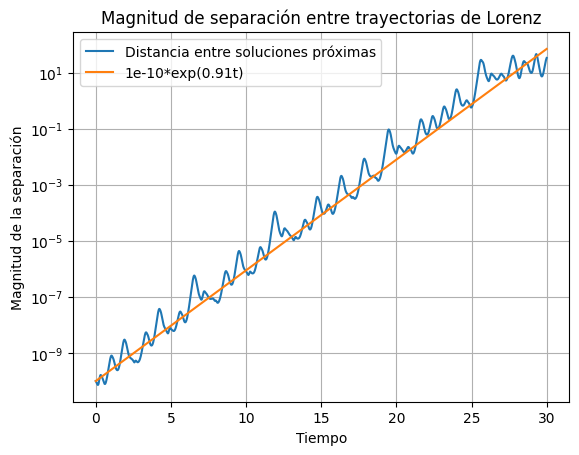

In [140]:
from Codigos import RungeKutta
a=10.0
b=28.0
c=8.0/3.0

Lorenz=RungeKutta.CrearFuncionLorenz(a,b,c)

initial_conditions1 = [2, 3, 14]
initial_conditions2 = [2, 3, 14 - 1e-10]
t_span = [0, 30]
h = 0.001

t_values1, y_values1 = RungeKutta.runge_kutta_4th_order(Lorenz, initial_conditions1, t_span, h)
t_values2, y_values2 = RungeKutta.runge_kutta_4th_order(Lorenz, initial_conditions2, t_span, h)

distance = np.sqrt(np.sum((y_values2 - y_values1)**2, axis=1))

# No usamos todo el rango de valores del tiempo pues mientras más cercano a 30s menos aproxima a una recta
log_distance = np.log(distance[:2800])
slope, _ = np.polyfit(t_values1[:2800], log_distance, 1)
print(slope)

plt.semilogy(t_values1, distance, label='Distancia entre soluciones próximas')
plt.semilogy(t_values1, 1e-10*np.exp(slope*t_values1), label=f'1e-10*exp({slope:.2f}t)')
plt.xlabel('Tiempo')
plt.ylabel('Magnitud de la separación')
plt.title('Magnitud de separación entre trayectorias de Lorenz')
plt.legend()
plt.grid(True)
plt.show()

Se muestra un código donde se calcula el exponente de Lyapunov teniendo en cuenta la separación por un epsilon del orden de $e-10$ entre dos trayectorias, luego se calcula la distancia entre ellas con el cual es posible calcular una pendiente que sería el exponente de lyapunov buscado. En el output del código se presenta tanto el coeficiente con mayor precisión numérica como la grafica de las distancias y la regresión lineal.

### Pila de arena

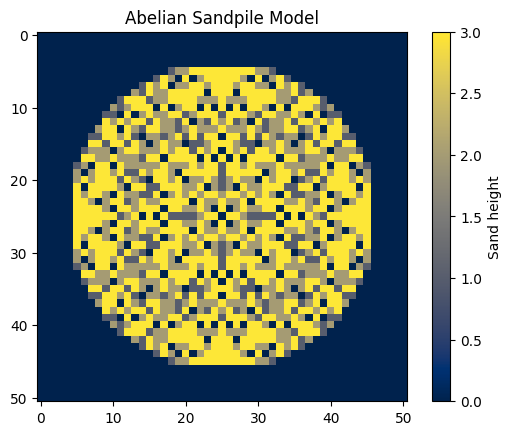

In [157]:
grid_size = 51
sand_drops = 3000
critical_height = 4

grid = np.zeros((grid_size, grid_size), dtype=int)

for _ in range(sand_drops):
    grid[25, 25] += 1
    while True:
        unstable_cells = np.where(grid >= critical_height)
        if len(unstable_cells[0]) == 0:
            break

        for i in range(len(unstable_cells[0])):
            x, y = unstable_cells[0][i], unstable_cells[1][i]
            grid[x, y] -=4
            if x > 0:
                grid[x-1, y] += 1
            if x < grid_size-1:
                grid[x+1, y] += 1
            if y > 0:
                grid[x, y-1] += 1
            if y < grid_size-1:
                grid[x, y+1] +=1

plt.imshow(grid, cmap='cividis', interpolation='nearest')
plt.title('Abelian Sandpile Model')
plt.colorbar(label='Sand height')
plt.show()

En este código se presenta el modelo de pila de arena sin condiciones de frontera periódica en el cual siempre se suelta el grano de arena en el centro del mallado. En caso de querer añadir que se suelte en una posición aleatoria, basta con cambiar la primera línea luego del ciclo for y poner coordenadas aleatorias con alguna función. Cabe destacar que para que los resultados mostrados tengan sentido es necesario que el número de granos de arenas a considerar soltar no excedan el número total de espacios múltiplicados por 3, pues en ese punto cada iteración se volvería inestable.